# SQL Task 

In [1]:
# Importing the required libraries

import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the code below and write your observation in the next cell

conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

cursor.execute("PRAGMA table_info('Salaries')")
cols = cursor.fetchall()
for col in cols:
    print(col[1])

[('Salaries',)]
Id
EmployeeName
JobTitle
BasePay
OvertimePay
OtherPay
Benefits
TotalPay
TotalPayBenefits
Year
Notes
Agency
Status


### Read the code above. Write observations here, i.e. what the code is trying to do..
.
.

In [3]:
# Reading the data from database and storing it in the dataframe

df = pd.read_sql_query("""SELECT * FROM Salaries""", conn)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


## Q_sample: Who is getting the maximum salary?

In [4]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT MAX(TotalPay) FROM Salaries""", conn)
output

,MAX(TotalPay)
0,567595.43


In [5]:
# Pandas Implementation - 1

max(df.TotalPay)

567595.43

In [6]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[df.TotalPay == max(df.TotalPay), ['TotalPay']]

,TotalPay
0,567595.43


<h3>
If you observe the above output, it is giving the maximum salary. 

Inorder to understand who is getting the maximum salary look at the next cell. 

Also try to map Pandas .loc syntax with the SQL SELECT Query.
</h3>

In [7]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT * 
                            FROM Salaries 
                            WHERE TotalPay = (SELECT MAX(TotalPay) FROM Salaries)""", conn)
output

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,


In [8]:
# Pandas Implementation

df.loc[df.TotalPay == max(df.TotalPay)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,


## Now try and answer below mentioned questions using SQL and equivalent Pandas Queries:

1. Retrieve the top 8 rows from the table.
2. What is the average TotalPay?
3. What is the highest amount of BasePay in the dataset?
4. What is the Job title of 'NATHANIEL FORD'?
5. How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?
6. What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)
7. How many unique jobs are there?
8. What are the top 5 most common jobs?
9. How many people have the word Chief in their job title?



Reference - https://www.sqlitetutorial.net

In [9]:
#sqlite3 implementation 
## for retriving top rows we use LIMIT
output = pd.read_sql_query("""SELECT * FROM Salaries LIMIT 8 """, conn)
output

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,,307899.46,307899.46,2011,,San Francisco,


In [10]:
# Pandas Implementation
df.head(8)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,


In [11]:
#2. What is the average TotalPay?
## sqlite implementation
output = pd.read_sql_query("""SELECT  AVG(TotalPay) FROM Salaries """,conn)
output

,AVG(TotalPay)
0,74768.321972


In [12]:
## pandas implementation
df['TotalPay'].mean()

74768.321971703

In [13]:
#3. What is the highest amount of BasePay in the dataset?
# sqlite implementation
output= pd.read_sql_query("""SELECT MAX(BasePay) FROM salaries WHERE BasePay!='Not Provided' AND BasePay!=''""",conn)
output

,MAX(BasePay)
0,319275.01


In [14]:
df1=df.copy()

In [15]:
# Pandas implementation
df1['BasePay'].replace('Not Provided',np.nan,inplace=True)
df1['BasePay'].replace(' ',np.nan,inplace=True)
df1['BasePay']=df1['BasePay'].apply(pd.to_numeric)
x=df1['BasePay'].mean()
df1['BasePay'].replace([np.nan],x,inplace=True)
max(df1['BasePay'])

319275.01

In [16]:
# sql implementation
#What is the Job title of 'NATHANIEL FORD'
output= pd.read_sql_query("""SELECT JobTitle FROM Salaries WHERE EmployeeName='NATHANIEL FORD'""",conn)
output

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


In [17]:
# pandas implementation
df['JobTitle'][df['EmployeeName']=='NATHANIEL FORD']

0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
Name: JobTitle, dtype: object

In [18]:
#How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?
output= pd.read_sql_query("""SELECT TotalPayBenefits FROM Salaries WHERE EmployeeName='NATHANIEL FORD'""",conn)
output

,TotalPayBenefits
0,567595.43


In [19]:
# Pandas implementation
df['TotalPayBenefits'][df['EmployeeName']=='NATHANIEL FORD']

0    567595.43
Name: TotalPayBenefits, dtype: float64

In [20]:
#6. What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)
output= pd.read_sql_query("""SELECT AVG(TotalPay) FROM salaries WHERE Year='2011'""",conn)
output

,AVG(TotalPay)
0,71744.103871


In [21]:
output= pd.read_sql_query("""SELECT AVG(TotalPay) FROM salaries WHERE Year='2012'""",conn)
output

,AVG(TotalPay)
0,74113.262265


In [22]:
output= pd.read_sql_query("""SELECT AVG(TotalPay) FROM salaries WHERE Year='2013'""",conn)
output

,AVG(TotalPay)
0,77611.443142


In [23]:
output= pd.read_sql_query("""SELECT AVG(TotalPay) FROM salaries WHERE Year='2014'""",conn)
output

,AVG(TotalPay)
0,75463.91814


In [24]:
## Pandas Implementation
print(df['TotalPay'][df['Year']==2011].mean())
print(df['TotalPay'][df['Year']==2012].mean())
print(df['TotalPay'][df['Year']==2013].mean())
print(df['TotalPay'][df['Year']==2014].mean())

71744.10387123664
74113.26226513737
77611.44314205405
75463.91814023


In [25]:
#7. How many unique jobs are there?
# sql implementation
output = pd.read_sql_query("""SELECT COUNT(DISTINCT JobTitle) From salaries""",conn)
output

,COUNT(DISTINCT JobTitle)
0,2159


In [26]:
#Python implementation
df['JobTitle'].nunique()

2159

In [27]:
output=pd.read_sql_query("""SELECT JobTitle, COUNT(JobTitle) AS value_occurrence FROM Salaries GROUP BY JobTitle ORDER BY 
value_occurrence DESC LIMIT 5""",conn)
output

,JobTitle,value_occurrence
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421


In [28]:
# Pandas Implementation
df1['JobTitle'].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [29]:
#9. How many people have the word Chief in their job title?
output = pd.read_sql_query("""SELECT COUNT(JobTitle) FROM Salaries WHERE JobTitle LIKE '%CHIEF%' """,conn)
output

,COUNT(JobTitle)
0,627


#Pandas Implementation
x=list(df1['JobTitle'])

# EDA:-

In [30]:
data=df.copy()
data

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [31]:
data.replace('Not Provided',np.nan,inplace=True)

In [32]:
data.replace('',np.nan,inplace=True)

In [33]:
data.replace('Not provided',np.nan,inplace=True)

In [34]:
data.isnull().sum()

Id                       0
EmployeeName             6
JobTitle                 4
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [35]:
data.drop(columns=['Notes','Status'],axis=1,inplace=True)

In [36]:
a=data['EmployeeName'].mode()
data['EmployeeName'].replace([np.nan],a,inplace=True)

In [37]:
a=data['JobTitle'].mode()
data['JobTitle'].replace([np.nan],a,inplace=True)

In [38]:
data['BasePay']=data['BasePay'].apply(pd.to_numeric)
a=data['BasePay'].mean()
data['BasePay'].replace([np.nan],a,inplace=True)


In [39]:
data['OvertimePay']=data['OvertimePay'].apply(pd.to_numeric)
a=data['OvertimePay'].mean()
data['OvertimePay'].replace([np.nan],a,inplace=True)

In [40]:
data['OtherPay']=data['OtherPay'].apply(pd.to_numeric)
a=data['OtherPay'].mean()
data['OtherPay'].replace([np.nan],a,inplace=True)


In [41]:
data['Benefits']=data['Benefits'].apply(pd.to_numeric)
a=data['Benefits'].mean()
data['Benefits'].replace([np.nan],a,inplace=True)

In [42]:
data.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# Plots:-

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148654 non-null float64
OvertimePay         148654 non-null float64
OtherPay            148654 non-null float64
Benefits            148654 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Agency              148654 non-null object
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


# Univariate Analysis:-

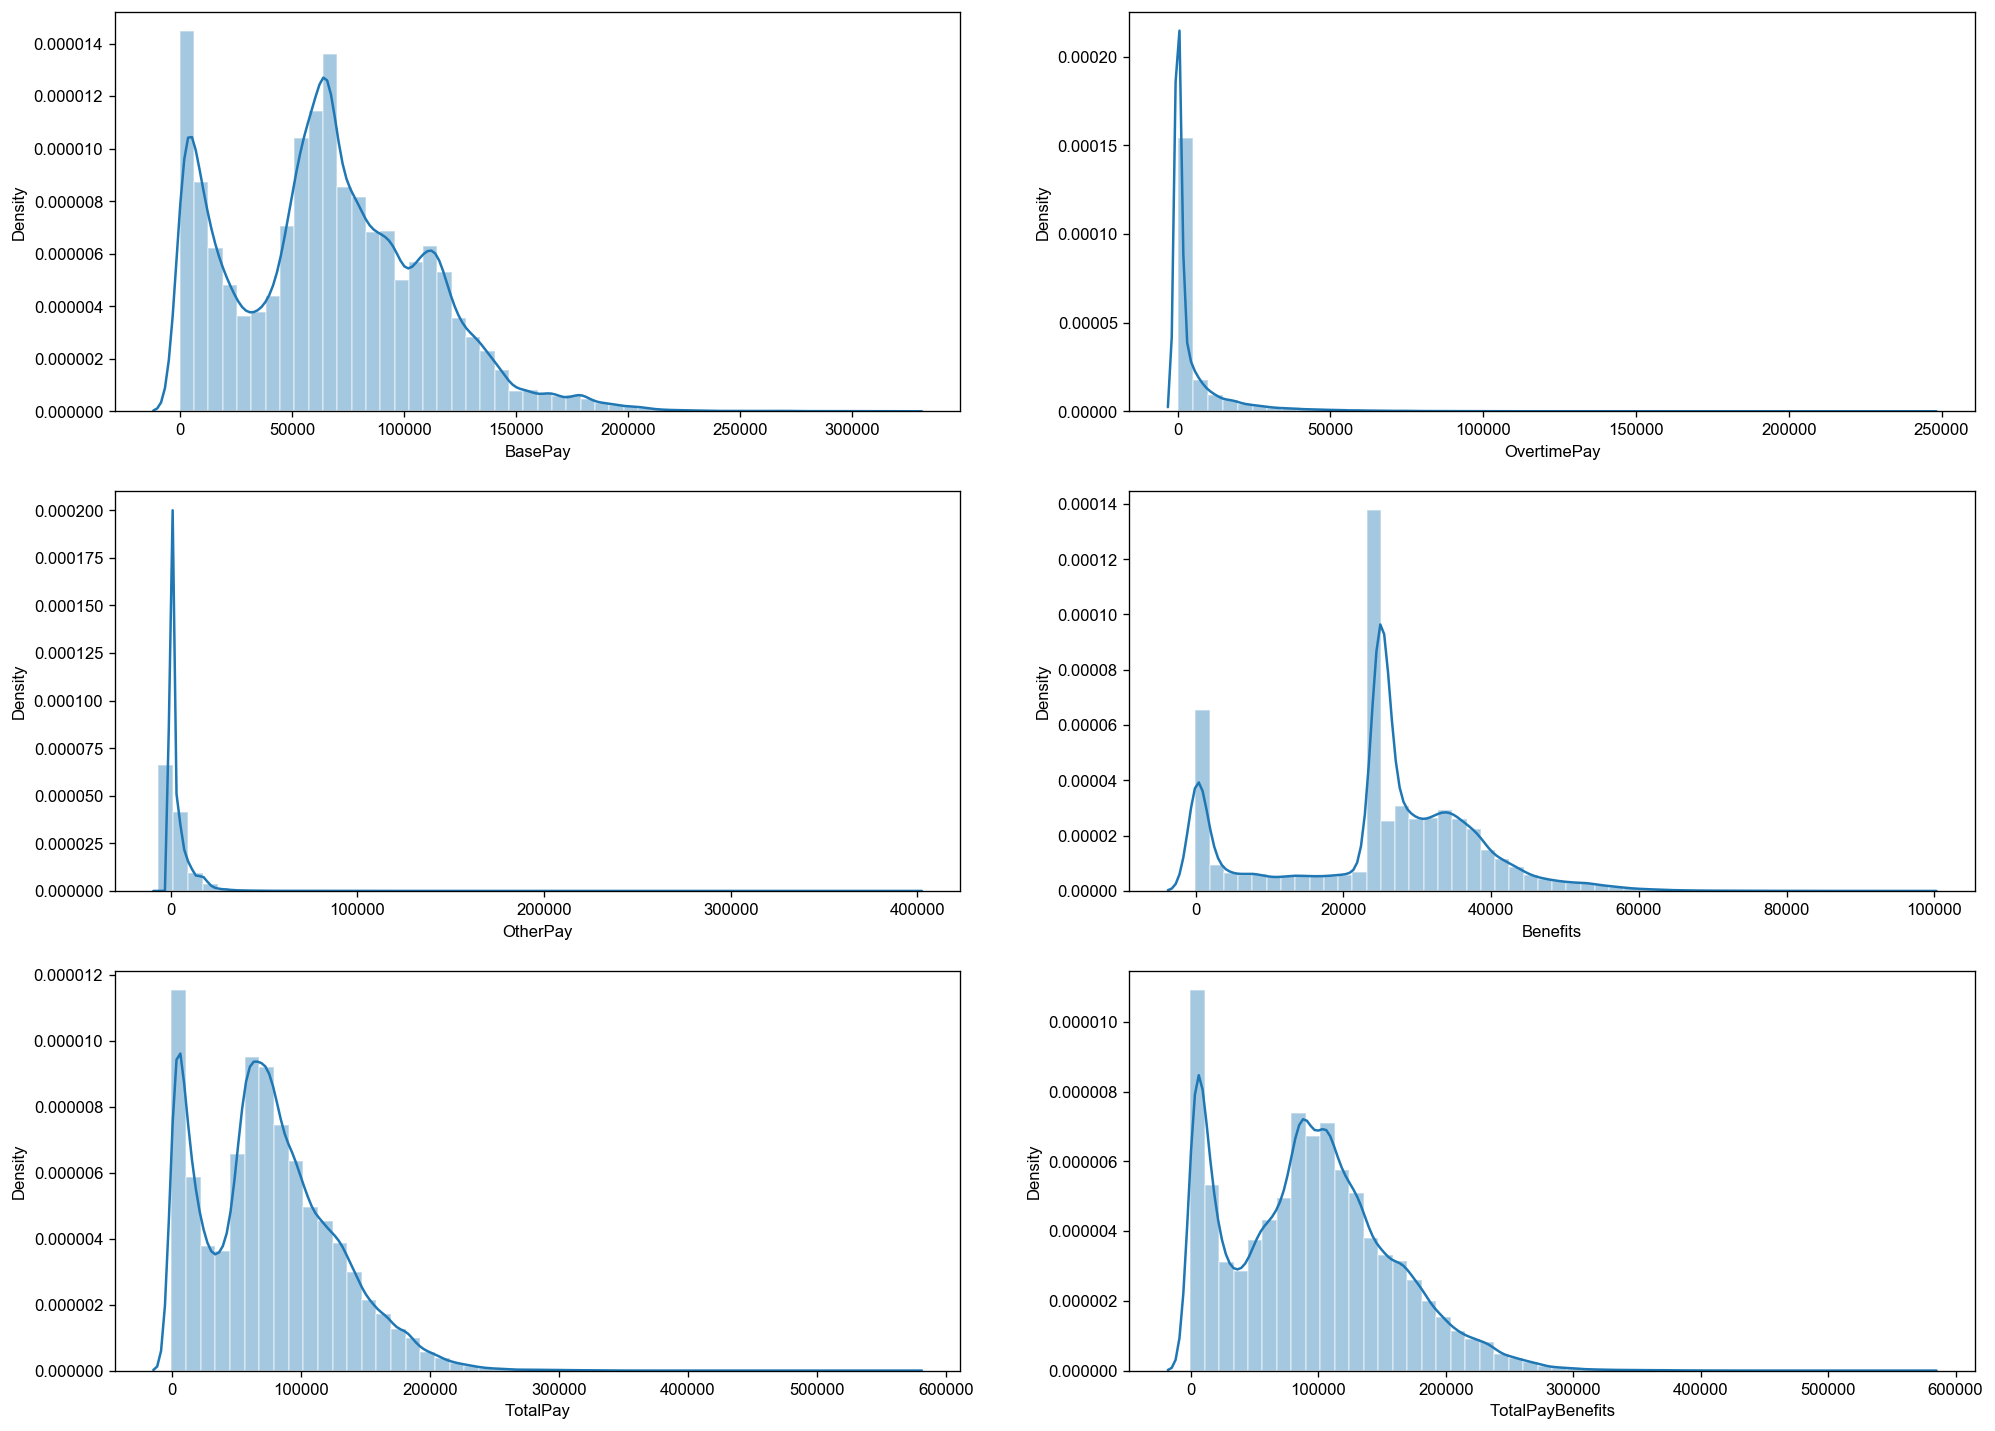

In [44]:
fig,ax=plt.subplots(3,2,figsize=(20,15),dpi=120)
sns.set()
sns.distplot(data['BasePay'],ax=ax[0][0])
sns.distplot(data['OvertimePay'],ax=ax[0][1])
sns.distplot(data['OtherPay'],ax=ax[1][0])
sns.distplot(data['Benefits'],ax=ax[1][1])
sns.distplot(data['TotalPay'],ax=ax[2][0])
sns.distplot(data['TotalPayBenefits'],ax=ax[2][1])
plt.show()

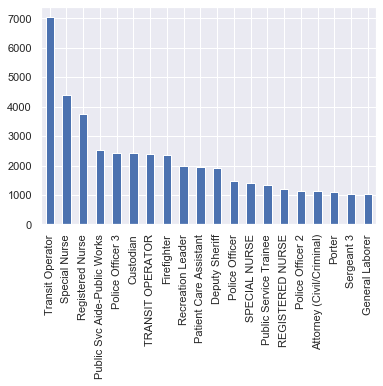

In [45]:
df1['JobTitle'].value_counts().head(20).plot.bar()

**JobTitle with Transit operator are more when compare to others**

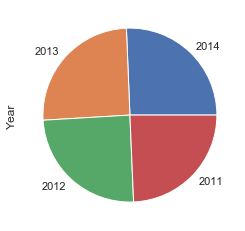

In [46]:
data['Year'].value_counts(normalize=True).plot.pie()

**Years are equally distributed**

# Bivariate Analysis:-

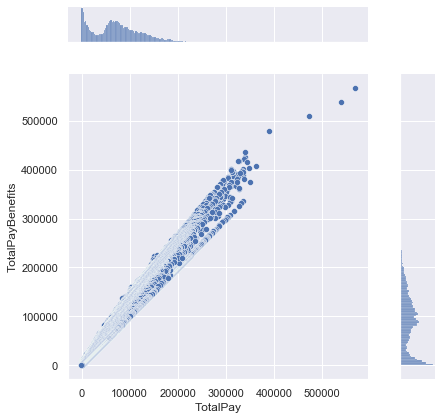

In [47]:
sns.jointplot(x='TotalPay',y='TotalPayBenefits',data=data,space=0.9)

**As Totalpay increases Totalpaybenefits also increases.**

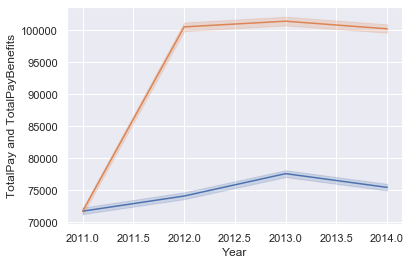

In [48]:
sns.lineplot(x='Year',y='TotalPay',data=data)
sns.lineplot(x='Year',y='TotalPayBenefits',data=data)
plt.ylabel('TotalPay and TotalPayBenefits')
plt.show()

**The totalpay is consistent but after 2012 the totalpaybenefits has been increased**

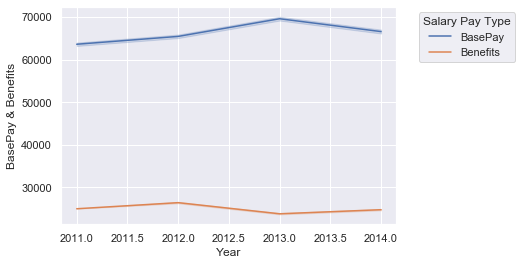

In [49]:
sns.lineplot(x='Year',y='BasePay',data=data,label='BasePay')
sns.lineplot(x='Year',y='Benefits',data=data,label='Benefits')
plt.ylabel('BasePay & Benefits')
plt.legend(title='Salary Pay Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

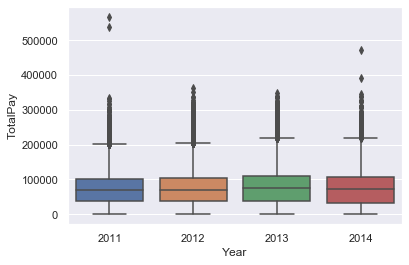

In [50]:
sns.boxplot(x='Year',y='TotalPay',data=data)

**There are Outliers**

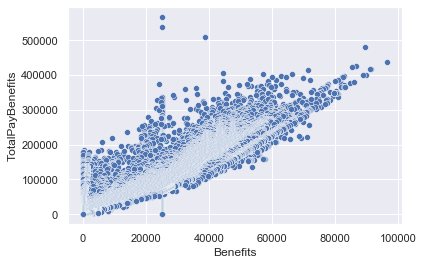

In [51]:
sns.scatterplot(x='Benefits',y='TotalPayBenefits',data=data)

**As Benefits increases TitalPayBenefits also increases**

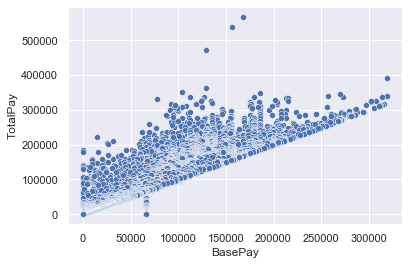

In [52]:
sns.scatterplot(x='BasePay',y='TotalPay',data=data)

**As BasePay increases TotalPay also increases**

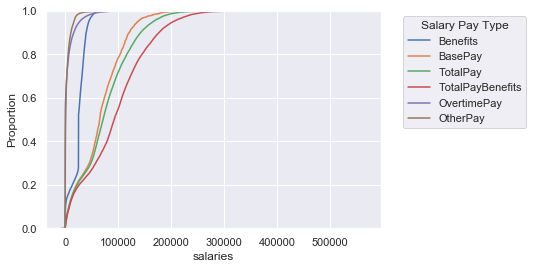

In [53]:
sns.ecdfplot(data['Benefits'],label='Benefits')
sns.ecdfplot(data['BasePay'],label='BasePay')
sns.ecdfplot(data['TotalPay'],label='TotalPay')
sns.ecdfplot(data['TotalPayBenefits'],label='TotalPayBenefits')
sns.ecdfplot(data['OvertimePay'],label='OvertimePay')
sns.ecdfplot(data['OtherPay'],label='OtherPay')
plt.xlabel('salaries')
plt.legend(title='Salary Pay Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148654 non-null float64
OvertimePay         148654 non-null float64
OtherPay            148654 non-null float64
Benefits            148654 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Agency              148654 non-null object
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


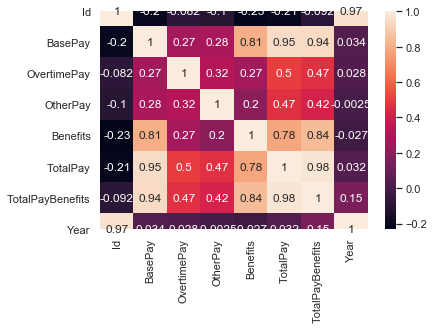

In [55]:
sns.heatmap(data.corr(),annot=True)

**the variables correlation values which are greater than 0.75 are highly positively correlated**

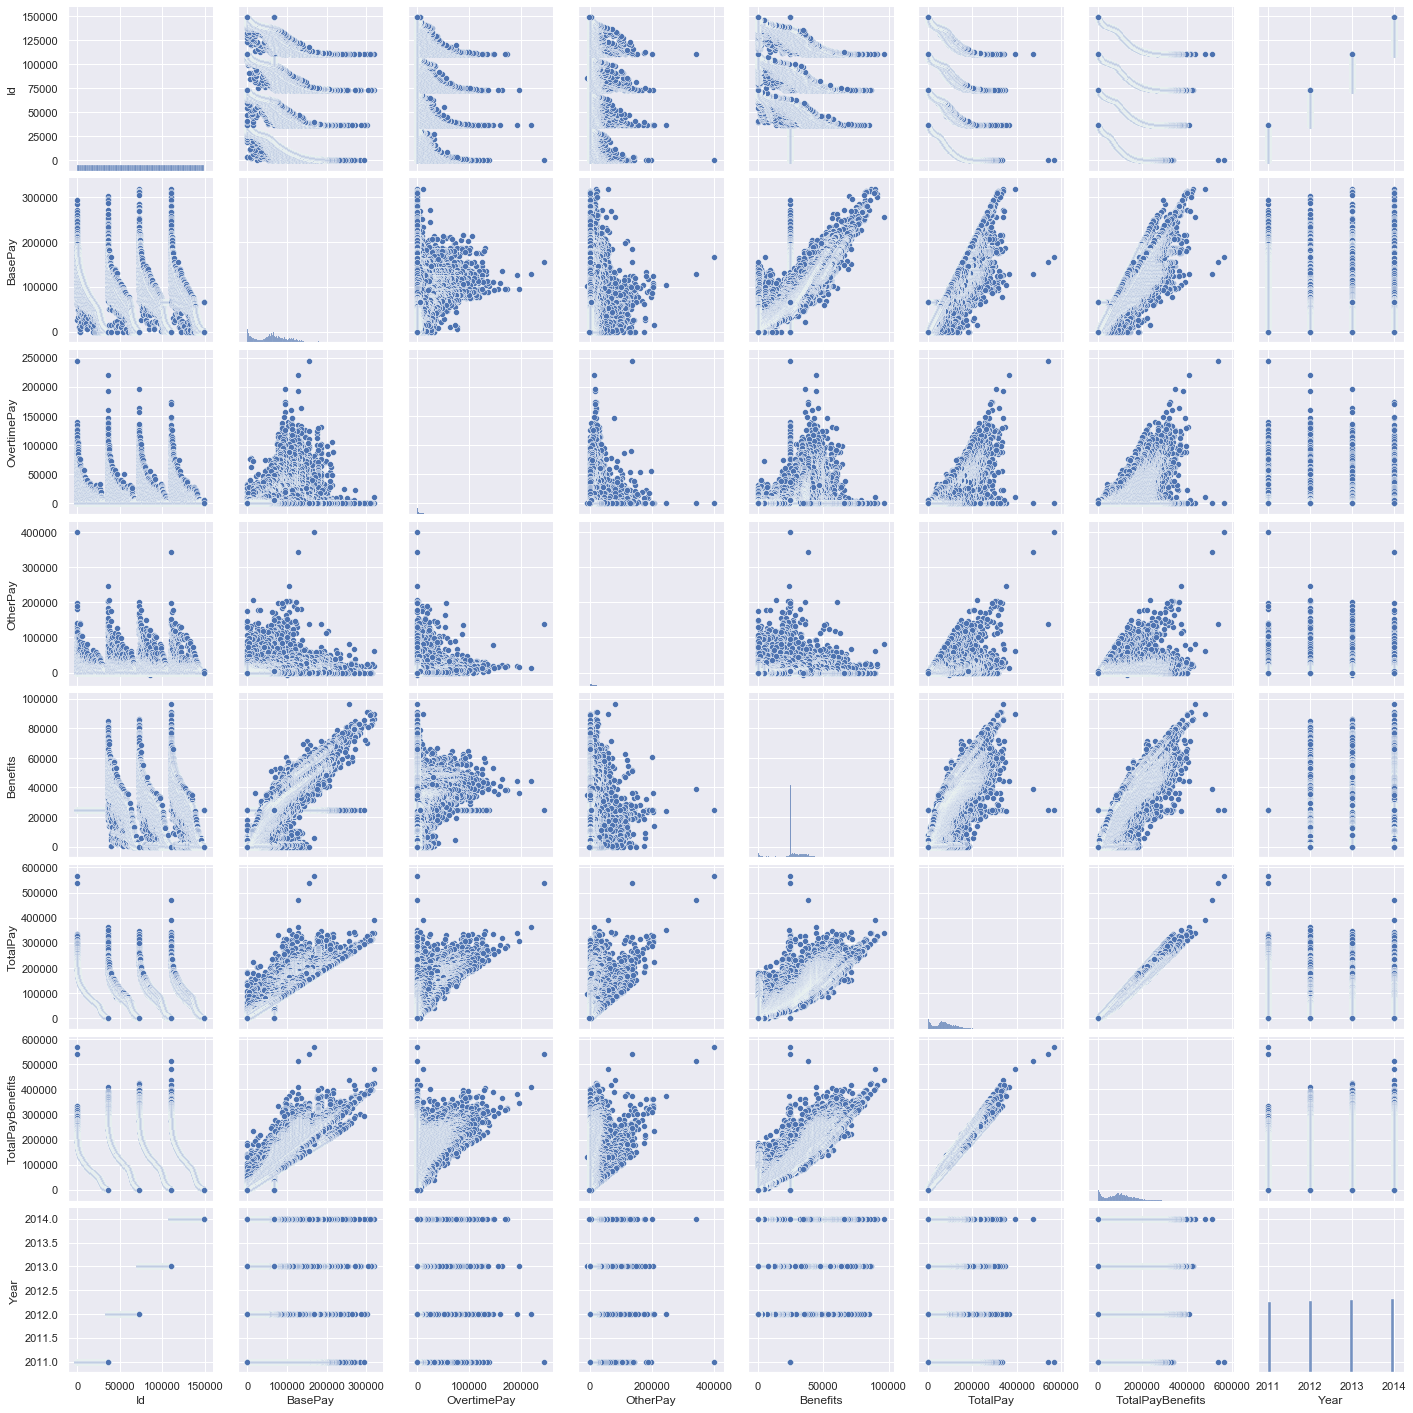

In [56]:
sns.pairplot(data)